In [1]:
from __future__ import division
import numpy as np
import os, sys
import matplotlib
#matplotlib.use('Agg')
%matplotlib nbagg
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict


def getCDF(data):
    xdata = np.sort(data)
    ydata = [i/len(xdata) for i in range(len(xdata))]
    return xdata, ydata

## LOAD 1 HOUR/LATE NIGHT DATA
- 24 JAN 2017
- 2AM-3AM

In [48]:
df = pd.read_csv("../data/dns_data_cs/1hour-night/split_hour_00002_20170124015900.csv", sep="|", error_bad_lines=False,
                names=['time', 'srcip', 'dstip', 'dnsquery']).dropna()

df['time'] = pd.to_numeric(df['time'])

In [51]:
df.head()

,time,srcip,dstip,dnsquery
0,0.004084,10.9.186.52,10.8.0.5,www.youtube.com
1,0.004886,10.9.186.52,10.8.0.6,www.youtube.com
2,0.007861,10.9.231.134,10.8.0.5,instagram.com
3,0.010363,10.9.186.52,10.8.0.5,youtube-ui.l.google.com
4,0.026029,10.9.185.235,10.8.0.5,guzzoni.apple.com


## STATS

In [52]:
print "Total time of dns record:", (df.iloc[-1]['time'] - df.iloc[0]['time']), "s"
print "Total number of queries: ", len(df)
print "Queries without source IP (are probably IPv6 so IP was not extracted): ", len(df[df['srcip']==''])

print "Unique source IPs (devices or homes):", len(df['srcip'].unique())
print "Unique destination IPs (DNS servers):", len(df['dstip'].unique())

print "Unique queries:", len(df['dnsquery'].unique())

Total time of dns record: 3599.988897 s
Total number of queries:  1099284
Queries without source IP (are probably IPv6 so IP was not extracted):  0
Unique source IPs (devices or homes): 8130
Unique destination IPs (DNS servers): 186
Unique queries: 67467


In [151]:
dns_server = df.groupby(['dstip'])['time'].count()
dns_server.sort(ascending=False)
dns_server

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


dstip
10.8.0.5           672094
128.112.129.209    165375
128.112.129.7      139709
10.8.0.6            59598
128.112.128.1       16772
128.112.129.32      10348
128.112.133.220     10076
8.8.8.8              7355
192.168.1.1          5947
10.6.48.10           2689
10.6.48.144          1728
8.8.4.4              1572
128.112.129.111      1410
208.122.23.23         568
10.6.48.92            548
10.6.48.240           442
185.37.37.37          410
10.6.48.91            372
65.111.161.119        261
128.112.133.221       199
77.234.44.22          186
208.67.220.222        181
192.168.0.1           166
194.187.251.67        166
185.37.39.39          159
10.3.2.20             134
10.6.49.108           122
172.18.0.1            104
199.85.127.10          72
10.8.124.56            50
                    ...  
140.180.221.138         1
140.180.221.122         1
140.180.221.119         1
140.180.221.113         1
140.180.220.90          1
140.180.222.115         1
140.180.220.80          1
140.18

## NUMBER OF QUERIES PER SOURCE IP

In [58]:
tot_queries = df.groupby(['srcip'])['dnsquery'].count()
#tot_queries

<IPython.core.display.Javascript object>


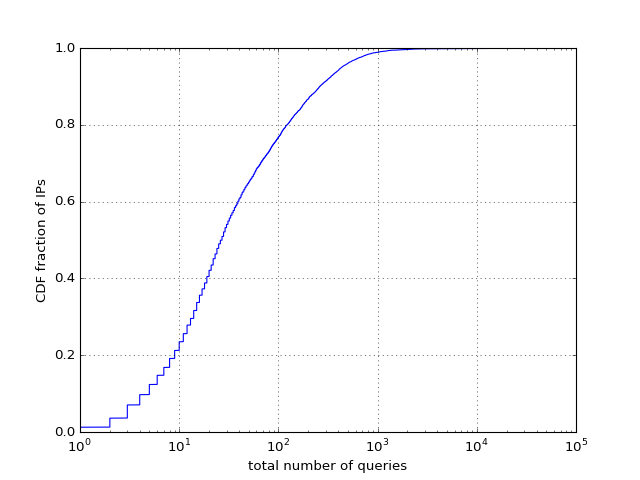

In [57]:
x,y = getCDF( tot_queries.values )

fig1, ax1 = plt.subplots()
ax1.plot(x,y)
ax1.set_xscale("log", nonposx='clip')
ax1.grid(1)
ax1.set_xlabel('total number of queries')
ax1.set_ylabel('CDF fraction of IPs')
fig1.show()

## NUMBER OF UNIQUE QUERIES PER SOURCE IP

In [60]:
gp1 = df.groupby(['srcip', 'dnsquery'])

In [61]:
df1 = gp1['time'].count().reset_index()

df1.head(20)

,srcip,dnsquery,time
0,10.6.48.10,CSGUM212W.princeton.edu,1
1,10.6.48.10,CSGUM213W.princeton.edu,1
2,10.6.48.10,_sipfederationtls._tcp.drexel.edu,3
3,10.6.48.10,a1363.dscg.akamai.net,9
4,10.6.48.10,api-dc8397fa.duosecurity.com,10
5,10.6.48.10,app.cronofy.com,2
6,10.6.48.10,bogus-mname.princeton.edu,2
7,10.6.48.10,crl.incommon-rsa.org,1
8,10.6.48.10,crl.microsoft.com,1
9,10.6.48.10,crl.usertrust.com,1


In [62]:
len(df1)

364635

In [65]:
df_bad_q = df1[ (~df1['dnsquery'].str.contains(".")) | (df1['dnsquery'].str.contains("<"))]

In [66]:
len(df_bad_q)

32

In [67]:
df_bad_q

,srcip,dnsquery,time
30419,10.8.124.56,<Unknown extended label>,122
30420,10.8.124.56,"<Unknown extended label>,<Unknown extended label>",38
30421,10.8.124.56,"<Unknown extended label>,<Unknown extended lab...",1
30422,10.8.124.56,"<Unknown extended label>,<Unknown extended lab...",14
30423,10.8.124.56,"<Unknown extended label>,<Unknown extended lab...",3
30424,10.8.124.56,"<Unknown extended label>,<Unknown extended lab...",1
30425,10.8.124.56,"<Unknown extended label>,<Unknown extended lab...",1
50869,10.8.152.67,<Root>,1
129072,10.8.3.83,<Unknown extended label>,1
129073,10.8.3.83,"<Unknown extended label>,<Unknown extended label>",1


In [64]:
# filter
df2 = df1[ (df1['dnsquery'].str.contains(".")) & (~df1['dnsquery'].str.contains("<"))]
len(df2)

364603

In [68]:
gp2 = df2.groupby('srcip')
df3 = gp2['dnsquery'].count()

In [70]:
print "Number of source IPs =", len(df3)
print "Number of unique queries =", sum(df3)

Number of source IPs = 8129
Number of unique queries = 364603


<IPython.core.display.Javascript object>


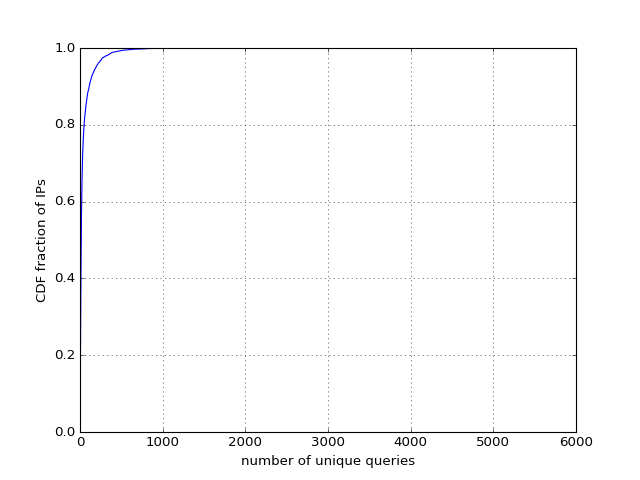

In [76]:
x,y = getCDF(df3.values)

fig1, ax1 = plt.subplots()
ax1.plot(x,y)
#ax1.set_xscale("log", nonposx='clip')
ax1.grid(1)
ax1.set_xlabel('number of unique queries')
ax1.set_ylabel('CDF fraction of IPs')
fig1.show()

<IPython.core.display.Javascript object>


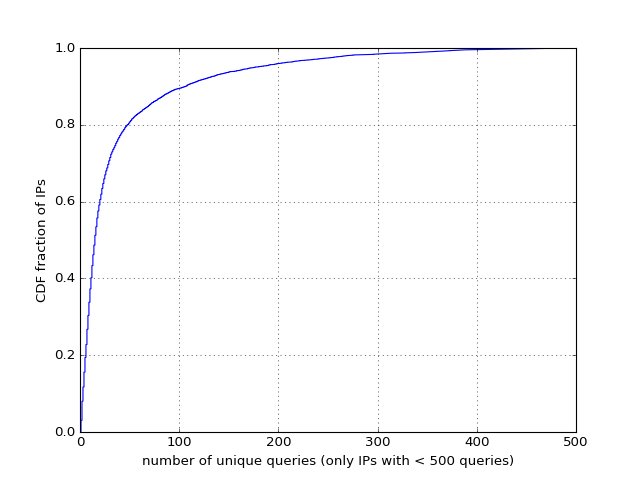

In [79]:
df4 = df3[ df3<500 ]

x,y = getCDF(df4.values)

fig1, ax1 = plt.subplots()
ax1.plot(x,y)
#ax1.set_xscale("log", nonposx='clip')
ax1.grid(1)
ax1.set_xlabel('number of unique queries (only IPs with < 500 queries)')
ax1.set_ylabel('CDF fraction of IPs')
fig1.show()

In [81]:
print len(df4), len(df3)

8074 8129


In [83]:
df5 = df3[df3<50]
len(df5)

6495

In [88]:
df5.head()

srcip
10.6.48.10     23
10.6.48.100    13
10.6.48.103    11
10.6.48.104     8
10.6.48.105    11
Name: dnsquery, dtype: int64

## 1. FILTER IP/DNS to only those with less than 500 queries in 1 hour

In [93]:
df_query_count = df2 [ df2['srcip'].isin(df5.index) ]
print len(df_query_count)
df_query_count.head()

94119


,srcip,dnsquery,time
0,10.6.48.10,CSGUM212W.princeton.edu,1
1,10.6.48.10,CSGUM213W.princeton.edu,1
2,10.6.48.10,_sipfederationtls._tcp.drexel.edu,3
3,10.6.48.10,a1363.dscg.akamai.net,9
4,10.6.48.10,api-dc8397fa.duosecurity.com,10


## 2. FILTER BY NUMBER OF QUERIES TO ANY UNIQUE DOMAIN <= 60 IN 1 HOUR
- Confirm this magic number in meeting
- Can also go for total number of queries instead of number of queries to unique domain per hour
- Need to confirm characteristics of bg traffic
- example: nest thermostat one query per 10 mins
- how to separate bg of computers/mobiles and bg of iots using this?

In [95]:
df_query_count2 = df_query_count[df_query_count['time']<=60]
print len(df_query_count2)
df_query_count2

93874


,srcip,dnsquery,time
0,10.6.48.10,CSGUM212W.princeton.edu,1
1,10.6.48.10,CSGUM213W.princeton.edu,1
2,10.6.48.10,_sipfederationtls._tcp.drexel.edu,3
3,10.6.48.10,a1363.dscg.akamai.net,9
4,10.6.48.10,api-dc8397fa.duosecurity.com,10
5,10.6.48.10,app.cronofy.com,2
6,10.6.48.10,bogus-mname.princeton.edu,2
7,10.6.48.10,crl.incommon-rsa.org,1
8,10.6.48.10,crl.microsoft.com,1
9,10.6.48.10,crl.usertrust.com,1


In [152]:
dns_popular = df_query_count2.groupby('dnsquery')['srcip'].count()
dns_popular.sort()
dns_popular

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


dnsquery
â.princeton.edu                                        1
gso100w.princeton.edu                                   1
gsdpxbbysyxe.princeton.edu                              1
s.pinimg.com                                            1
s.pmddby.com                                            1
s.skimresources.com                                     1
gs2-sec.ww.prod.dl.playstation.net                      1
s.tpctrust.com                                          1
s.update.openx.com                                      1
s.update.rubiconproject.com                             1
s.w.org                                                 1
groups.google.com                                       1
groupme.com                                             1
grokio.blob.core.windows.net                            1
grits.enthought.com                                     1
s.zkcdn.net                                             1
greygoose.princeton.edu                                 1
grego

### EXAMPLE FOR BG QUERIES TO *.XBOXLIVE.COM

In [103]:
xbox_q = df_query_count2 [ df_query_count2['dnsquery'].str.contains('xboxlive.com') ]

xbox_q_count = xbox_q.groupby('srcip')['time'].sum()

In [157]:
xbox_q.groupby('dnsquery')['srcip'].count()

dnsquery
accounts.xboxlive.com                                1
appchannels-connect.xboxlive.com                     1
assets1.xboxlive.com                                 2
attestation.xboxlive.com                             8
cloudcollection-ssl.xboxlive.com                     6
data-vef.xboxlive.com                                1
eplists.xboxlive.com                                 2
images-eds.xboxlive.com                              1
instance.mgt.xboxlive.com                            2
musicdelivery-ssl.xboxlive.com                       6
notify.xboxlive.com                                  2
peoplehub.xboxlive.com                               1
profile.xboxlive.com                                 1
settings-ssl.xboxlive.com                           15
settings.xboxlive.com                                6
social.xboxlive.com                                  1
title.auth.xboxlive.com                              1
title.mgt.xboxlive.com                               3
t

<IPython.core.display.Javascript object>


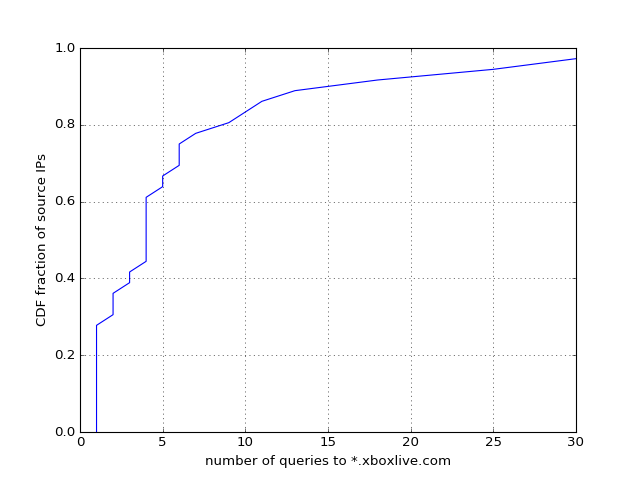

In [104]:
# CDF of number of queries to xboxlive.com related domains

x,y = getCDF(xbox_q_count.values)

fig1, ax1 = plt.subplots()
ax1.plot(x,y)
#ax1.set_xscale("log", nonposx='clip')
ax1.grid(1)
ax1.set_xlabel('number of queries to *.xboxlive.com')
ax1.set_ylabel('CDF fraction of source IPs')
fig1.show()

### EXAMPLE FOR BG QUERIES TO *.FITBIT.COM
- mostly queries from fitbit app to a server
- these IPs are most probably phones

In [108]:
fitbit_q = df_query_count2 [ df_query_count2['dnsquery'].str.contains('fitbit.com') ]
fitbit_q

,srcip,dnsquery,time
14865,10.8.105.206,fsc.fitbit.com,1
14871,10.8.105.206,iphone-cdn-api.fitbit.com,2
14872,10.8.105.206,iphone-cdn-client.fitbit.com,4
20102,10.8.111.63,desktop-client.fitbit.com,1
20103,10.8.111.63,desktop-static.fitbit.com,1
23844,10.8.116.133,iphone-cdn-api.fitbit.com,12
23845,10.8.116.133,iphone-cdn-client.fitbit.com,4
41305,10.8.139.152,iphone-cdn-api.fitbit.com,4
41306,10.8.139.152,iphone-cdn-client.fitbit.com,4
47762,10.8.147.158,desktop-client.fitbit.com,1


In [109]:
fitbit_q_count = fitbit_q.groupby('srcip')['time'].sum()
fitbit_q_count.head()

srcip
10.8.105.206     7
10.8.111.63      2
10.8.116.133    16
10.8.139.152     8
10.8.147.158     2
Name: time, dtype: int64

<IPython.core.display.Javascript object>


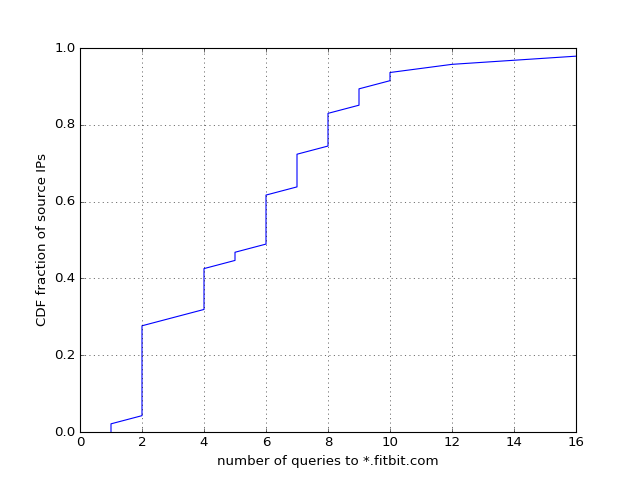

In [110]:
# CDF of number of queries to fitbit.com related domains

x,y = getCDF(fitbit_q_count.values)

fig1, ax1 = plt.subplots()
ax1.plot(x,y)
#ax1.set_xscale("log", nonposx='clip')
ax1.grid(1)
ax1.set_xlabel('number of queries to *.fitbit.com')
ax1.set_ylabel('CDF fraction of source IPs')
fig1.show()

# STUDYING TIME PATTERN OF BG QUERIES
- Example iphone fitbit client queries
- shows 900 second pattern (3-4 queries per hour)

In [142]:
all_fitbit_client_q = df[ df['dnsquery']=='iphone-cdn-client.fitbit.com' ]

print len(all_fitbit_client_q), len(all_fitbit_client_q['srcip'].unique())

all_fitbit_client_q

112 29


,time,srcip,dstip,dnsquery
10667,31.775905,10.8.21.156,10.8.0.5,iphone-cdn-client.fitbit.com
33778,94.711757,10.8.116.133,10.8.0.5,iphone-cdn-client.fitbit.com
55441,151.995178,10.9.121.232,10.8.0.5,iphone-cdn-client.fitbit.com
71222,195.423877,10.9.160.46,10.8.0.5,iphone-cdn-client.fitbit.com
80834,222.442488,10.8.168.166,10.8.0.5,iphone-cdn-client.fitbit.com
83372,231.302850,10.9.61.203,10.8.0.5,iphone-cdn-client.fitbit.com
86876,241.107014,10.9.200.223,10.8.0.5,iphone-cdn-client.fitbit.com
104972,286.087824,10.8.247.34,10.8.0.5,iphone-cdn-client.fitbit.com
113439,309.623059,10.9.61.191,10.8.0.5,iphone-cdn-client.fitbit.com
120265,330.083071,10.8.222.53,10.8.0.5,iphone-cdn-client.fitbit.com


In [115]:
all_fitbit_client_q[ all_fitbit_client_q['srcip']=='10.8.21.156' ]

,time,srcip,dstip,dnsquery
10667,31.775905,10.8.21.156,10.8.0.5,iphone-cdn-client.fitbit.com
332589,950.169391,10.8.21.156,10.8.0.5,iphone-cdn-client.fitbit.com
618687,1871.280133,10.8.21.156,10.8.0.5,iphone-cdn-client.fitbit.com
885184,2792.914485,10.8.21.156,10.8.0.5,iphone-cdn-client.fitbit.com


In [116]:
all_fitbit_client_q[ all_fitbit_client_q['srcip']=='10.8.116.133' ]

,time,srcip,dstip,dnsquery
33778,94.711757,10.8.116.133,10.8.0.5,iphone-cdn-client.fitbit.com
350507,1007.774614,10.8.116.133,10.8.0.5,iphone-cdn-client.fitbit.com
633112,1920.279791,10.8.116.133,10.8.0.6,iphone-cdn-client.fitbit.com
895471,2832.795278,10.8.116.133,10.8.0.5,iphone-cdn-client.fitbit.com


In [117]:
all_fitbit_client_q[ all_fitbit_client_q['srcip']=='10.9.4.126' ]  

,time,srcip,dstip,dnsquery
298012,842.506517,10.9.4.126,10.8.0.5,iphone-cdn-client.fitbit.com
584116,1755.220422,10.9.4.126,10.8.0.5,iphone-cdn-client.fitbit.com
851595,2670.663096,10.9.4.126,10.8.0.5,iphone-cdn-client.fitbit.com
1095557,3587.300325,10.9.4.126,10.8.0.5,iphone-cdn-client.fitbit.com


### time pattern difference mean and std 

In [118]:
gp_fitbit = all_fitbit_client_q.groupby('srcip')['time']

In [123]:
def get_time_diff(a):
    return [t - s for s, t in zip(a, a[1:])]

In [141]:
time_diff_fitbit = gp_fitbit.apply(lambda x: get_time_diff( tuple(x) ))
print len(time_diff_fitbit)
time_diff_fitbit

29


srcip
10.8.105.206                 [916.270245, 915.563813, 917.130909]
10.8.116.133                 [913.062857, 912.505177, 912.515487]
10.8.134.149                 [959.814482, 959.859444, 960.338687]
10.8.139.152                 [916.741701, 915.815647, 915.284422]
10.8.161.95                   [918.93382, 916.702536, 919.880416]
10.8.168.166                                                   []
10.8.190.222    [917.014177, 1.09999998585e-05, 917.782895, 0....
10.8.206.113                             [962.273541, 958.764799]
10.8.21.156                  [918.393486, 921.110742, 921.634352]
10.8.212.117                 [917.621996, 917.565851, 917.809963]
10.8.222.53                  [908.780306, 642.774004, 910.153313]
10.8.229.201                 [924.283843, 916.103112, 915.580597]
10.8.247.34                  [922.497237, 921.518021, 921.288653]
10.9.102.149                                         [915.553466]
10.9.110.115                   [912.55575, 912.28529, 912.270252]
10.9

In [139]:
describe_dict = defaultdict(list)

for ix, row in time_diff_fitbit.iteritems():
    describe_dict['srcip'].append(ix)
    describe_dict['count'].append( len(row) )
    describe_dict['mean'].append( np.mean(row) )
    describe_dict['std'].append( np.std(row) )
    #describe_dict['median'].append( np.median(row) )
    
fitbit_client_time_stats = pd.DataFrame(describe_dict).set_index('srcip')

In [140]:
fitbit_client_time_stats

,count,mean,std
srcip,,,
10.8.105.206,3,916.321656,0.640796
10.8.116.133,3,912.694507,0.260497
10.8.134.149,3,960.004204,0.237226
10.8.139.152,3,915.947257,0.602166
10.8.161.95,3,918.505591,1.332233
10.8.168.166,0,NaN,NaN
10.8.190.222,5,367.700629,448.828566
10.8.206.113,2,960.519170,1.754371
10.8.21.156,3,920.379527,1.420519


### FITBIT IPHONE CLIENT BG TRAFFIC CONCLUSION
- in one hour 3 background dns queries to "iphone-cdn-client.fitbit.com"
- mean time between queries is between 910 to 960 seconds with low stc

## similar analysis for android
- android-cdn-client.fitbit.com
- number of queries are much lesser (1-2) per hour as compared to iphone app
- probably larger time interval between queries

In [147]:
all_fitbit_client_q = df[ df['dnsquery']=='android-cdn-client.fitbit.com' ]

print len(all_fitbit_client_q), len(all_fitbit_client_q['srcip'].unique())

all_fitbit_client_q.head()

28 14


,time,srcip,dstip,dnsquery
26781,75.152250,10.8.172.204,10.8.0.5,android-cdn-client.fitbit.com
43812,122.365191,10.8.245.204,10.8.0.5,android-cdn-client.fitbit.com
50199,138.760608,10.9.16.247,10.8.0.5,android-cdn-client.fitbit.com
74054,202.210007,10.8.150.246,10.8.0.5,android-cdn-client.fitbit.com
164482,458.094998,10.9.24.82,10.8.0.5,android-cdn-client.fitbit.com


In [144]:
gp_fitbit = all_fitbit_client_q.groupby('srcip')['time']

time_diff_fitbit = gp_fitbit.apply(lambda x: get_time_diff( tuple(x) ))
print len(time_diff_fitbit)
time_diff_fitbit


14


srcip
10.8.150.246                 [1165.249829]
10.8.172.204     [1209.787417, 2004.68744]
10.8.183.109                            []
10.8.186.253                 [2277.139958]
10.8.245.204                 [1271.156992]
10.8.246.40                  [2465.860892]
10.8.76.229     [1284.795327, 1506.963962]
10.9.114.14                  [2377.184684]
10.9.16.247     [1331.487286, 1236.063058]
10.9.21.127                   [1371.53131]
10.9.220.83                             []
10.9.24.82                   [1305.070181]
10.9.86.154                             []
10.9.96.176                  [1223.926055]
Name: time, dtype: object

In [145]:
describe_dict = defaultdict(list)

for ix, row in time_diff_fitbit.iteritems():
    describe_dict['srcip'].append(ix)
    describe_dict['count'].append( len(row) )
    describe_dict['mean'].append( np.mean(row) )
    describe_dict['std'].append( np.std(row) )
    #describe_dict['median'].append( np.median(row) )
    
fitbit_client_time_stats = pd.DataFrame(describe_dict).set_index('srcip')

In [146]:
fitbit_client_time_stats

,count,mean,std
srcip,,,
10.8.150.246,1,1165.249829,0.000000
10.8.172.204,2,1607.237428,397.450011
10.8.183.109,0,NaN,NaN
10.8.186.253,1,2277.139958,0.000000
10.8.245.204,1,1271.156992,0.000000
10.8.246.40,1,2465.860892,0.000000
10.8.76.229,2,1395.879644,111.084318
10.9.114.14,1,2377.184684,0.000000
10.9.16.247,2,1283.775172,47.712114


# ALGO TO FIND IOT RELATED IPs & QUERIES (check)

### How to find IPs that are IoTs in our dataset?
- Find IP, queries that are background data
- If srcip only producing background data during late night hours => classify as IoT
- If number of unique queries < THRESH and number of unique 1st level domain queries < THRESH2 => classify as IoT (?)

### How to find (IP, query) that is background data?
- groupby query
- groupby srcip
- enumerate 'time' list
- diff 'time' list
- count, mean, std of diff time list vs srcip
- if for query Q, (count, mean, std) for most srcip are "similar" => Q, srcip are background data

### Why use full query and not 1st/2nd level domains?
- summing stats for multiple queries => can't perform above time baded IoT/bg traffic filtering properly as counts, means etc will mess up due to a mix of unrelated query timings
- summing 1/2nd level domain only useful for absolute filter (eg: unique queries per IP to 1st level domain < THRESH etc.)

In [47]:
def reduce_domain(domain, level):
    tmp = domain.split('.')
    out = '.'.join( tmp[-level:] )
    return out
    
reduce_domain('www.youtube.com', 1)

'com'